# 근사 알고리즘 (Approxtimation Algorithm)
* NP-완전 문제: 다항식 시간에 해결할 수 있는 알고리즘이 아직 발견 안됨
* 아직 누구도 “이 문제들을 다항식 시간에 해결할 수 없다”고 증명하지 못함
* 대부분 학자는 NP-완전 문제들을 해결할 다항식 시간 알고리즘이 존재하지 않을 것이라고 추측
* NP-완전 문제를 어떤 방식으로든지 해결하려면 다음의 3가지 중 1가지는 포기해야
 1. 다항식 시간에 해를 찾는 것
 2. 모든 입력에 대해 해를 찾는 것
 3. 최적해를 찾는 것
* 근사 알고리즘은 최적해를 찾는 것을 포기하고 근사해를 찾는 대신 다항식 수행 시간을 갖는다.
* 근사 비율 : 근사해의 값과 최적해(간접적인 해)의 값의 비율


## 외판원 문제 (Traveling Salesperson Problem, TSP)
* 어느 한 도시에서 출발하여 다른 모든 도시를 1번씩만 방문하고 출발했던 도시로 돌아오는 여행 경로의 거리를 최소화하는 문제
* 외판원 문제는 다양한 알고리즘으로 최적해를 찾을 수 있으나 이들은 모두 지수 시간이 걸림
* 따라서 도시 수가 많아지면 시간이 오래 걸려서 최적해를 찾기 점점 어려워진다.
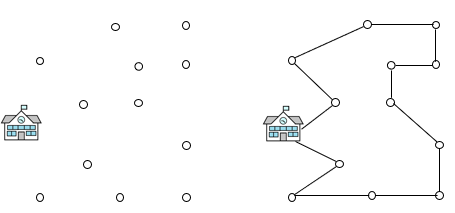

### TSP와 비슷한 특성을 가진 MST

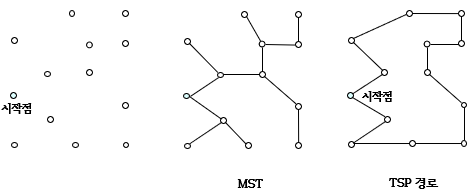

* 차이점 : TSP는 시작점으로 돌아와야 하므로 TSP 경로의 간선 수는 n이고, MST의 간선 수는 n-1이다.

### MST의 간선을 활용하여 TSP 경로만들기
* 먼저 트리의 시작점에서 모든 점을 방문하고 시작점으로 돌아와야 함.
* 트리는 사이클이 없으므로 어느 점은 1번 이상 방문
* 시작점이 A일때 방문 순서  
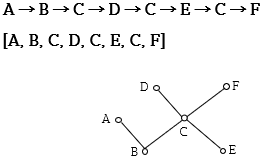
* 돌아오는 경로를 포함하면 [A,B,C,D,C,E,C,F,**C,B,A**]

### 지름길 찾기
* 지름길을 이용해 각 점을 한 번만 방문하도록 바꾸기
* 트리 방문 순서에서 반복되는 점을 경로에서 제거한다.  
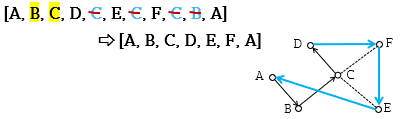

[예]

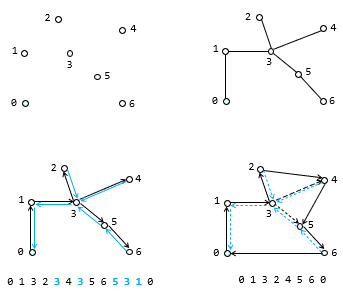

### TSP 근사 알고리즘
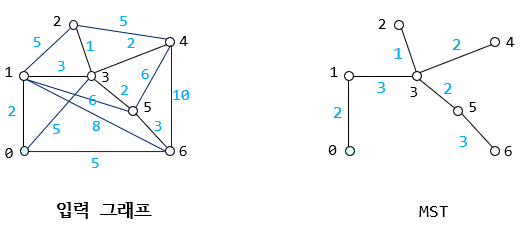

[1] 입력 그래프에서 MST T를 찾는다.  
[2] T의 시작점에서 트리의 간선을 따라 모든 점을 방문하고 다시 시작점으로 방문 순서를 찾는다.  
[3] [2]에서 찾은 방문 순서에서 중복된 점들을 제거하여 TSP 경로를 만든다. 단, 마지막의 시작점은 제거하지 않는다.


In [1]:
tree = [[1], [0, 3], [3], [1, 2, 4, 5], [3], [3, 6], [5]]  # MST 인접 리스트
n = len(tree)  # 그래프 정점 수
INF = float('inf')
g = [[0, 2, INF, 5, INF, INF, 5],
     [2, 0, 5, 3, INF, 6, 8],
     [INF, 5, 0, 1, 5, INF, INF],
     [5, 3, 1, 0, 2, 2, INF],
     [INF, INF, 5, 3, 0, 6, 10],
     [INF, 6, INF, 2, 6, 0, 3],
     [5, 8, INF, INF, 10, 3, 0]]
visited = [False for _ in range(n)]  # 방문되면 True 로
path = []  # 방문 순서

#1. MST를 탐색하며 경로리스트에 추가하기
def dfs(v):
    visited[v] = True
    path.append(v)
    for w in tree[v]:
        if not visited[w]:
            dfs(w)
            path.append(v)

dfs(0)
print('트리 방문 순서: ',path)
s = []          

#2. 이미 방문한 점을 리스트에서 제거하기
for vertex in path:
    if vertex not in s:
        s.append(vertex)
s.append(0)
print('TSP 경로: ', s)

distance = 0
for i in range(n):
    distance += g[s[i]][s[i+1]]
print('경로 길이: ', distance)


트리 방문 순서:  [0, 1, 3, 2, 3, 4, 3, 5, 6, 5, 3, 1, 0]
TSP 경로:  [0, 1, 3, 2, 4, 5, 6, 0]
경로 길이:  25


### 수행시간
* MST는 크러스컬/프림 알고리즘의 수행 시간
* 트리 간선을 따라서 점의 방문 순서를 얻는 것은 O(n) 시간 소요 (트리이므로 간선 수는 n-1)
* 반복되는 점 제거도 방문 순서를 왼쪽부터 하나씩 검사하면서 처음 나타나는 점은 놓아두고 반복되는 점은 제거하므로 O(n) 시간
* 총 수행 시간: 크러스컬/프림 알고리즘의 수행 시간


### 근사비율
* 외판원 문제의 최적해를 실질적으로 알 수 없으므로, ‘간접적인’ 최적해인 MST 간선의 가중치의 합(M)을 최적해의 값으로 활용
* TSP 근사 알고리즘이 계산한 근사해의 값은 2M보다는 크지 않다.
* Step [2]에서 MST의 간선을 따라서 방문 순서를 찾을 때 사용된 트리 간선을 살펴보면, 각 간선이 정확히 2번 사용되었다. 따라서 이 방문 순서에 따른 경로의 총 길이는 2M
* Step [3]에서는 삼각 부등식 원리를 이용하여 새로운 방문 순서를 만들기 때문에, 이전 방문 순서에 따른 경로의 길이보다 새로운 방문 순서에 따른 경로의 길이가 더 짧다.
* 따라서 이 알고리즘의 근사 비율은 2M/M = 2.0보다 크지 않다. 즉, 근사해는 최적해의 2배를 넘지 않는다.


## 집합 커버
* n개의 원소(숫자)를 가진 집합 U가 있고, U의 부분 집합들을 원소로 하는 집합 F가 있을 때, F의 원소들 중에서 어떤 원소들을 선택하여 합집합하면 U와 같은가?
* 집합 커버(Set Cover) 문제 - F에서 선택하는 집합들의 수를 최소화하는 문제



### 학교 건설
10개의 마을이 있는 신도시에 학교를 다음 두 가지 조건이 만족되도록 만들려고 한다.
* 학교는 마을에 위치해야 한다.
* 등교 거리는 걸어서 15분 이내이어야 한다.  
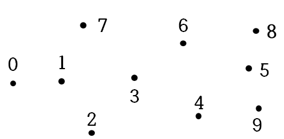
* 어느 마을에 학교를 신설해야 학교의 수가 최소가 될까?  
* 문제의 조건에 따라 걸어서 15분 이내에 이동 가능한 마을 사이에 간선을 표시하면 다음 그림과 같다.  
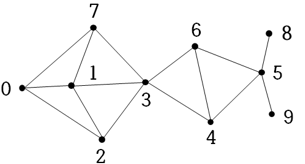
  
U = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}       # 신도시의 마을 10개  
F = {S0, S1, S2, S3, S4, S5, S6, S7, S8, S9}  
S0 = {0, 1, 2, 7} 		S4 = {3, 4, 5, 6} 		S8 = {5, 8}  
S1 = {0, 1, 2, 3, 7} 	S5 = {4, 5, 6, 8, 9} 	S9 = {5, 9}  
S2 = {0, 1, 2, 3} 		S6 = {3, 4, 5, 6}  
S3 = {1, 2, 3, 4, 6, 7} 	S7 = {0, 1, 3, 7}  
학교 배치 문제는 Si 집합들 중에서 최소의 집합들을 선택하여 그들의 합집합이 U와 같은가 하는 집합 커버 문제이다.


### 그리디 집합 커버 알고리즘
[1] C = []  
[2] while U가 empty가 아니면:  
[3] U의 원소들을 가장 많이 포함하고 있는 집합 Si를 F에서 선택  
[4] U = U - Si  
[5] Si의 원소를 다른 집합에서 제거  
[6] Si를 F에서 제거하고, Si를 C에 추가  

* 가장 큰 집합 S3을 step [3]에서 선택
* Step [4]에서는 U = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9} - {1, 2, 3, 4, 6, 7} = {0, 5, 8, 9}
* Step [5]에서 이미 S3 때문에 커버된 각 마을을 집합에서 각각 제거  
S0 = {0} 		S4 = {5} 		       S8 = {5, 8}  
S1 = {0} 		S5 = {5, 8, 9} 	       S9 = {5, 9}  
S2 = {0} 		S6 = {5}
S3 = {} 		       S7 = {0}  
* Step [6] C = {S3}  
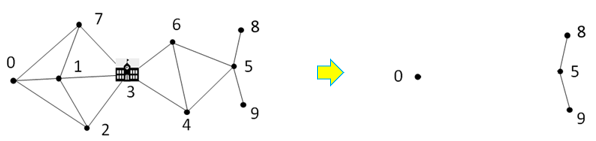

* Step [3]에서 S5={5, 8, 9}를 선택
* Step [5]에서 S5 때문에 커버된 각 마을을 집합에서 각각 제거  
 S0 = {0} 		S4 = {} 		S8 = {}  
 S1 = {0} 		S5 = {} 		S9 = {}  
 S2 = {0} 		S6 = {}  
 S3 = {} 		        S7 = {0}  
* Step [6]에서 C = {S3, S5}   
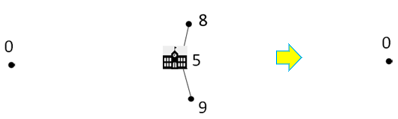

* Step [3]에서 S0을 선택
* S0 때문에 커버된 각 마을을 집합에서 각각 제거
 S0 = {} 		S4 = {} 		   S8 = {}  
 S1 = {} 		S5 = {} 		   S9 = {}  
 S2 = {} 		S6 = {}  
 S3 = {} 		S7 = {}  
* Step [6]에서 C = {S3, S5, S0}  
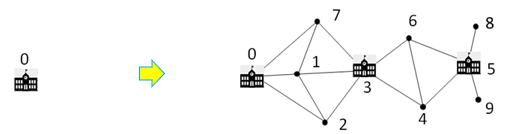

In [3]:
U = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
S = [{0, 1, 2, 7},        # s0
     {0, 1, 2, 3, 7},     # s1
     {0, 1, 2, 3},        # s2
     {1, 2, 3, 4, 6, 7},  # s3
     {3, 4, 5, 6},        # s4
     {4, 5, 6, 8, 9},     # s5
     {3, 4, 5, 6},        # s6
     {0, 1, 3, 7},        # s7
     {5, 8},              # s8
     {5, 9}]              # s9
set_cover = []            #[1] C = []  

#[2] while U가 empty가 아니면:  
while len(U) >0:
     #[3] U의 원소들을 가장 많이 포함하고 있는 집합 Si를 F에서 선택  
     max_cover_set = S.index(max(S, key= lambda x: len(U & x)))
     #[4] U = U - Si  
     U = U -S[max_cover_set]
     #[5] Si의 원소를 다른 집합에서 제거  
     for i in range(len(S)):
          if i !=max_cover_set:
               S[i] = S[i] -S[max_cover_set]
     #[6] Si를 F에서 제거하고, Si를 C에 추가  
     set_cover.append(max_cover_set)
     S[max_cover_set] = set()

print('집합 커버를 위한 부분집합 리스트: ', set_cover)

집합 커버를 위한 부분 집합 리스트: [3, 5, 0]


### 수행 시간
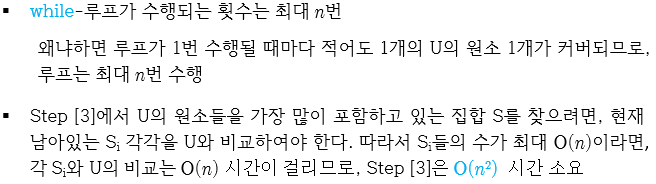
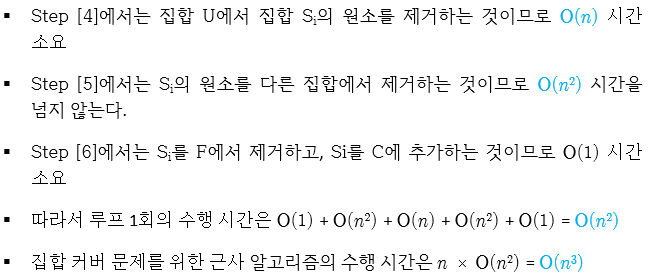

### 근사 비율
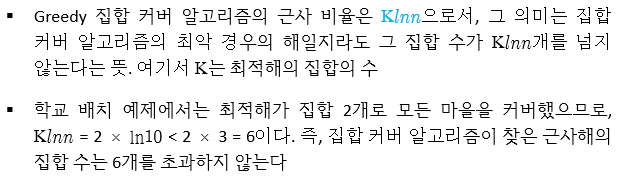

집합 문제의 최적해를 찾는 데는 지수 시간이 걸리지만 근사 알고리즘은 O(n^3)시간에 근사 해를 찾으며 그 해도 그리 나쁘지 않은 경우가 많다.

### 응용
집합 문제는 매우 다양한 분야에서 활용됨
* 도시 계획(City Planning)에서 공공 기관 배치하기
* 경비 시스템: 미술관, 박물관, 기타 철저한 경비가 요구되는 장소의 CCTV 카메라의 최적 배치
* 컴퓨터 바이러스 찾기
* 대기업의 구매 업체 선정
* 기업의 경력 직원 고용
* 네트워크 파일 공유
*우주 관측을 위한 최소의 망원경 수를 결정
